## **Tarea #1 Aprendizaje Automático**

Integrantes:

Jose Fabian Blanco
Diego Gutierrez
Estephanie Gomez

Lista:

Onwer: Jose
Introduccion de python y la libreria de pandas

Introducir el data set, para trabajarlo con las librerias, y por que se escoge este dataset

**Revision Inicial del data frame** Diego
cargar el data frame
data.info()
data.describe()
head y tail
shape-> ver columnas
datatype -> tipos de datos hay por
isnull ->missing data


Post procesar

Justificar eliminacion de datos nulos missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

EDA Estephanie

heatmap
pairplot
Box Plots & Histogram

Seleccionar una columna cuyos datos no sean normales y transformarlos a datos normalizados. Owner: Jose


End
En la columna se realiza un cambio a los valores categoricos y se convierten en un numero 000, 0001, 100, 110, 111 -> Para dejar una variable categorica lista para un PCA, tsne u otra tecnica.
Dejar la tabla escalada para cada columna
Conclusiones/Recomendaciones
Puede que se use o no dependiendo del criterio del data scientist

# **Sección 1: Introduccion a Python y librerías**

*   List item
*   List item





# **Sección 2: Conocer el raw data**

Trabajar el raw data set para conocer los datos y eliminar valores nulos

In [ ]:
#Se importan las librerias necesarias para realizar el procesamiento
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Para cargar el archivo .csv de manera que cualquiera persona pueda utilizar los datos, se cargo el archivo en GitHub y desde ahi se exporta
# el archivo mediante una url
url = 'https://raw.githubusercontent.com/Guti13/Aprendizaje-automatico/main/AirPollution.csv'

#Finalmente con Pandas se carga el dataframe en un variable
dataframeraw=pd.read_csv(url)


Para visualizar de manera inicial el data set cargado se puede utilizar la funcion de pandas '.head ( )', con lo cual nos imprime las primeras 5 filas del set de datos tal cual se encuentra en el data frame.

Consideraciones:


*   En este caso particular el data set ya contaba con los nombres de cada columna por lo que no fue necesario realizar este proceso.
*   Cambiando el espacio vacio en el parentesis "( )" se puede conseguir el número de filas deseado



In [ ]:
dataframeraw.head()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


De igual manera con la función ".tail( )" de pandas podemos visualizar las últimas 5 filas del data frame. Al igual que la función anterior podemos escoger un número mayor de filas al cambiar el número dentro del paréntesis.

In [ ]:
print (dataframeraw.tail())


     SrNo        Date     NO    CO    NO2      O3    SO2   PM2.5  Benzene  \
398   399  27-05-2016  48.15  0.91  72.45   87.46  18.91  287.42     2.71   
399   400  28-05-2016  14.21  0.81  46.07   46.74  24.12  157.15     1.75   
400   401  29-05-2016   1.64  0.63  32.67  120.28  14.09   63.49     0.99   
401   402  30-05-2016  34.38  1.27  61.31   41.64  18.18   58.36     2.21   
402   403  31-05-2016  23.09  1.08  57.55   68.12   9.50   77.29     2.05   

     Toulene  ...  WindSpeed  VerticalWindSpeed   Solar  BarPressure  Weather  \
398     9.76  ...       1.60              -0.15  138.25       733.96   Summer   
399     0.00  ...       2.15              -0.24  143.11       733.51   Summer   
400     0.00  ...       2.99               0.01  176.09       733.83   Summer   
401     7.73  ...       1.33              -0.09   87.97       734.55   Summer   
402     8.29  ...       1.38              -0.18  145.52       733.82   Summer   

     PD_PM2.5  PD_PM10  PD_NO2  PD_SO2  PD_CO  
39

Antes se mencionó que puede ser requerido cambiar y/o agregar nombres a las columnas del data set, para lo cual se puede utilizar la función "rename ()". Se puede utilizar también la función "columns", sin embargo esta requiere que se cambien los nombres de todas las columnas del data set en el orden específico, en cambio, "rename ( )" permite cambiar el nombre de columnas específicas, como se ejemplifica a continuación.

In [ ]:
dataframerename = dataframeraw.rename(columns={'SrNo': 'Dato', 'Date': 'Fecha', 'WindSpeed': 'Velocidad del Viento' })
dataframerename.head()

,Dato,Fecha,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,Velocidad del Viento,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


In [ ]:
print (dataframeraw.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

In [ ]:
print (dataframeraw.describe())

             SrNo          NO          CO         NO2          O3         SO2  \
count  403.000000  401.000000  402.000000  401.000000  397.000000  399.000000   
mean   202.000000   81.323292    2.210000   74.433791   56.298917   25.988496   
std    116.480327   97.204368    1.601589   25.862319   29.690436   25.273204   
min      1.000000    1.120000    0.220000   25.270000    4.980000    0.000000   
25%    101.500000   11.380000    1.202500   54.500000   30.120000    9.515000   
50%    202.000000   39.220000    1.780000   73.680000   53.210000   21.680000   
75%    302.500000  118.030000    2.737500   91.430000   76.850000   37.145000   
max    403.000000  480.900000   19.900000  149.010000  159.700000  371.750000   

            PM2.5     Benzene     Toulene    P_Xylene  ...        Temp  \
count  401.000000  402.000000  402.000000  372.000000  ...  401.000000   
mean   130.160673    6.525945   17.192488    8.128844  ...   24.425686   
std     84.196954    3.983177   10.410131    6.7

In [ ]:
missing_values = dataframeraw.isnull().sum()
print (missing_values)

SrNo                  0
Date                  0
NO                    2
CO                    1
NO2                   2
O3                    6
SO2                   4
PM2.5                 2
Benzene               1
Toulene               1
P_Xylene             31
NOx                   2
PM10                  2
WindDirection         1
NH3                   2
RH                    1
Temp                  2
WindSpeed             1
VerticalWindSpeed     2
Solar                 2
BarPressure           2
Weather               0
PD_PM2.5             10
PD_PM10              11
PD_NO2               12
PD_SO2               13
PD_CO                11
dtype: int64


In [ ]:
missing_percentage = (dataframeraw.isnull().sum() / len(dataframeraw)) * 100
print (missing_percentage)

SrNo                 0.000000
Date                 0.000000
NO                   0.496278
CO                   0.248139
NO2                  0.496278
O3                   1.488834
SO2                  0.992556
PM2.5                0.496278
Benzene              0.248139
Toulene              0.248139
P_Xylene             7.692308
NOx                  0.496278
PM10                 0.496278
WindDirection        0.248139
NH3                  0.496278
RH                   0.248139
Temp                 0.496278
WindSpeed            0.248139
VerticalWindSpeed    0.496278
Solar                0.496278
BarPressure          0.496278
Weather              0.000000
PD_PM2.5             2.481390
PD_PM10              2.729529
PD_NO2               2.977667
PD_SO2               3.225806
PD_CO                2.729529
dtype: float64


In [ ]:
dataframenulos=dataframeraw.dropna()

In [ ]:
missing_values = dataframenulos.isnull().sum()
print (missing_values)

SrNo                 0
Date                 0
NO                   0
CO                   0
NO2                  0
O3                   0
SO2                  0
PM2.5                0
Benzene              0
Toulene              0
P_Xylene             0
NOx                  0
PM10                 0
WindDirection        0
NH3                  0
RH                   0
Temp                 0
WindSpeed            0
VerticalWindSpeed    0
Solar                0
BarPressure          0
Weather              0
PD_PM2.5             0
PD_PM10              0
PD_NO2               0
PD_SO2               0
PD_CO                0
dtype: int64



# **Sección 3: Approach diferente al dataset y tecnicas EDA**


Esta parte del tutorial propone varios analisis que pueden ayudar a tener un entendimiento de los datos de manera exploratoria.


Como científicos de datos podemos escoger un approach en el cual rellenamos esos valores nulos con la moda, media, mediana de los datos, la decisión de hacerlo de esta forma depende del objetivo del estudio.

En  datos como los del air pollution la columna P_Xylene es la que tiene 31 valores nulos, uno puede escoger, el maximo, minimo, moda, mediana, etc. Para este caso, los valores vacios, decidimos usar la mediana, que seria el valor medio de los datos ordenados, podriamos tener valores mas cercanos a la realidad, no en todos los casos es igual. Por otro lado, la columna Weather que tiene una variable categorica, con algunos valores nulos, decidimos llenar dichos valores con la moda, esto quiere decir, que el dato nulo de esa columna fue llenado con el "Weather" o estación que tenga mas datos.

Para propósitos de este tutorial vamos a hacer una comparación entre tener un data frame con los valores nulos eliminados vs con los valores nulos reemplazados por media y la moda.

La sección 2 nos mostró como hacer una lectura de alto nivel de los datos de nuestro data frame, la sección 3 nos va a enseñar paso a paso, como trabajar los datos si mas bien queremos llenar los espacios nulos.


Tambien, esta seccion abarca la creacion de heat maps, correlaciones, boxplots, outliers, p values, transformacion de datos no normales y el escalamiento de las columnas.


In [ ]:
#dataframeraw: son los datos tal cual sin ningun cambio
#dataframenulos: son los datos con los nulos eliminados
#dataframefill: los datos nulos se rellenan con valores de moda y mediana

#Copia del dataframeraw
dataframefill = dataframeraw

print ("Rellenar espacios vacios")

#este for va por todas las columnas y reemplaza en Weather la moda entre las estaciones, y a las columnas numericas
for col in dataframefill.columns:

    if col == "Weather":
        dataframefill[col].fillna(value = dataframefill[col].mode()[0], inplace = True)

    else:
        dataframefill[col].fillna(value = dataframefill[col].median(), inplace = True)

#print (dataframefill.sample (3).T) #Esta linea de codigo es para que se pueda ver si los valores efectivamente se llenaron


#Estos prints podemos observar que dataframeraw y dataframefill tienen el mismo shape, mientras que dataframe nulos tiene menos rows

print ("dataframeraw", dataframeraw.shape)
print ("dataframenulos", dataframenulos.shape)
print ("dataframefill", dataframefill.shape)




Rellenar espacios vacios
dataframeraw (403, 25)
dataframenulos (347, 27)
dataframefill (403, 25)


La matriz de correlación, es una herramienta útil para determinar si las columnas se relacionan lineamente entre si en esta parte del código vamos a determinar si tenemos alguna correlacion lineal entre los dataframe nulos vs fill. Tres pasos:

1-Seleccionamos las 5 columnas numericas con mayor cantidad de valores nulos, que se pueden ver en la seccion 2.

2-Obtenemos la matriz de correlacion y restamos entre si para ver las diferencias.

3-Hacer la resta enter matrices para ver las diferencias entrer¿ las correlaciones.

Nota adicional: Al hacer la lectura de este output hay entradas en las matrices que van a dar 1 por que esta correlacionando la misma variable entre si por ejemplo, al correlacionar P_Xylene copn P_Xylene la correlacion va a hacer =1

In [ ]:
# Paso 1: definicion de columnas

columnas_seleccionadas = ['P_Xylene','PD_PM10','PD_NO2','PD_SO2','PD_CO' ]

#Paso 2: Matriz de correlación
print ("Matriz de correlacion para dataframenulos, con los nulos eliminados","\n")


correlacion_matriz_dataframenulos = dataframenulos[columnas_seleccionadas].corr()
print(correlacion_matriz_dataframenulos, "\n")


print ("Matriz de correlacion para dataframefill cuyos nulos fueron reemplazados por media y moda", "\n")
#funcion de correlacion
correlacion_matriz_dataframefill = dataframefill[columnas_seleccionadas].corr()
print(correlacion_matriz_dataframefill, "\n")


#Paso 3: La resta enter matrices
resta=correlacion_matriz_dataframenulos-correlacion_matriz_dataframefill
print ("Diferencia enter las correlaciones","\n", resta)

#con los 3 pasos podemos observar que comparando approaches los valores de correlacion si cambian
#determinar que tan importante puede ser este cambio depende del problema
#para propositos de aprendizaje voy a utilizar los datos reemplazados por moda y media



Matriz de correlacion para dataframenulos, con los nulos eliminados 

          P_Xylene   PD_PM10    PD_NO2    PD_SO2     PD_CO
P_Xylene  1.000000  0.503100  0.428108  0.373497  0.558821
PD_PM10   0.503100  1.000000  0.573963  0.550168  0.494974
PD_NO2    0.428108  0.573963  1.000000  0.485345  0.410813
PD_SO2    0.373497  0.550168  0.485345  1.000000  0.316410
PD_CO     0.558821  0.494974  0.410813  0.316410  1.000000 

Matriz de correlacion para dataframefill cuyos nulos fueron reemplazados por media y moda 

          P_Xylene   PD_PM10    PD_NO2    PD_SO2     PD_CO
P_Xylene  1.000000  0.481715  0.358074  0.316151  0.531493
PD_PM10   0.481715  1.000000  0.536814  0.387854  0.494461
PD_NO2    0.358074  0.536814  1.000000  0.317423  0.427008
PD_SO2    0.316151  0.387854  0.317423  1.000000  0.214909
PD_CO     0.531493  0.494461  0.427008  0.214909  1.000000 

Diferencia enter las correlaciones 
           P_Xylene   PD_PM10    PD_NO2    PD_SO2     PD_CO
P_Xylene  0.000000  0.021385  

En esta parte vamos a usar la herramienta de heat map, que es muy similar a la correlacion solamente que es mas visual. Las correlacioones van de -1 a 1. Los colores rojos dicen si una correlacion es positiva y colores azules la correlacion es negativa, si tenemos celdas de colores muy claros es un indicativo de que no hay correlacion.

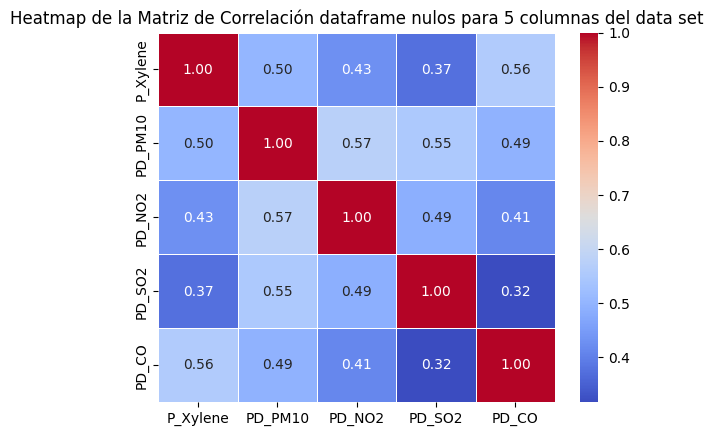

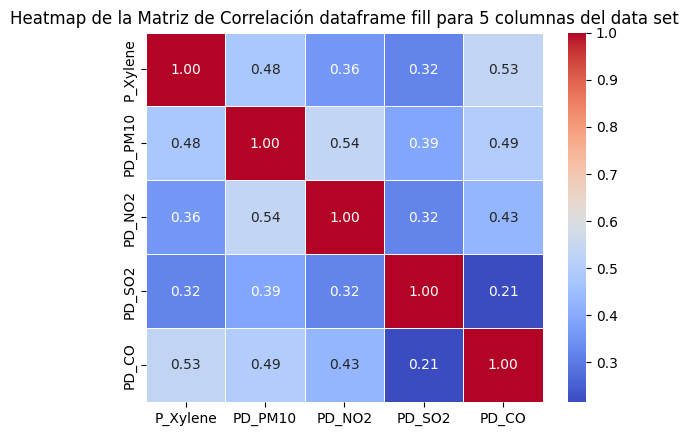

<ipython-input-154-fcf230e074b6>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matriz = dataframenulos.corr()


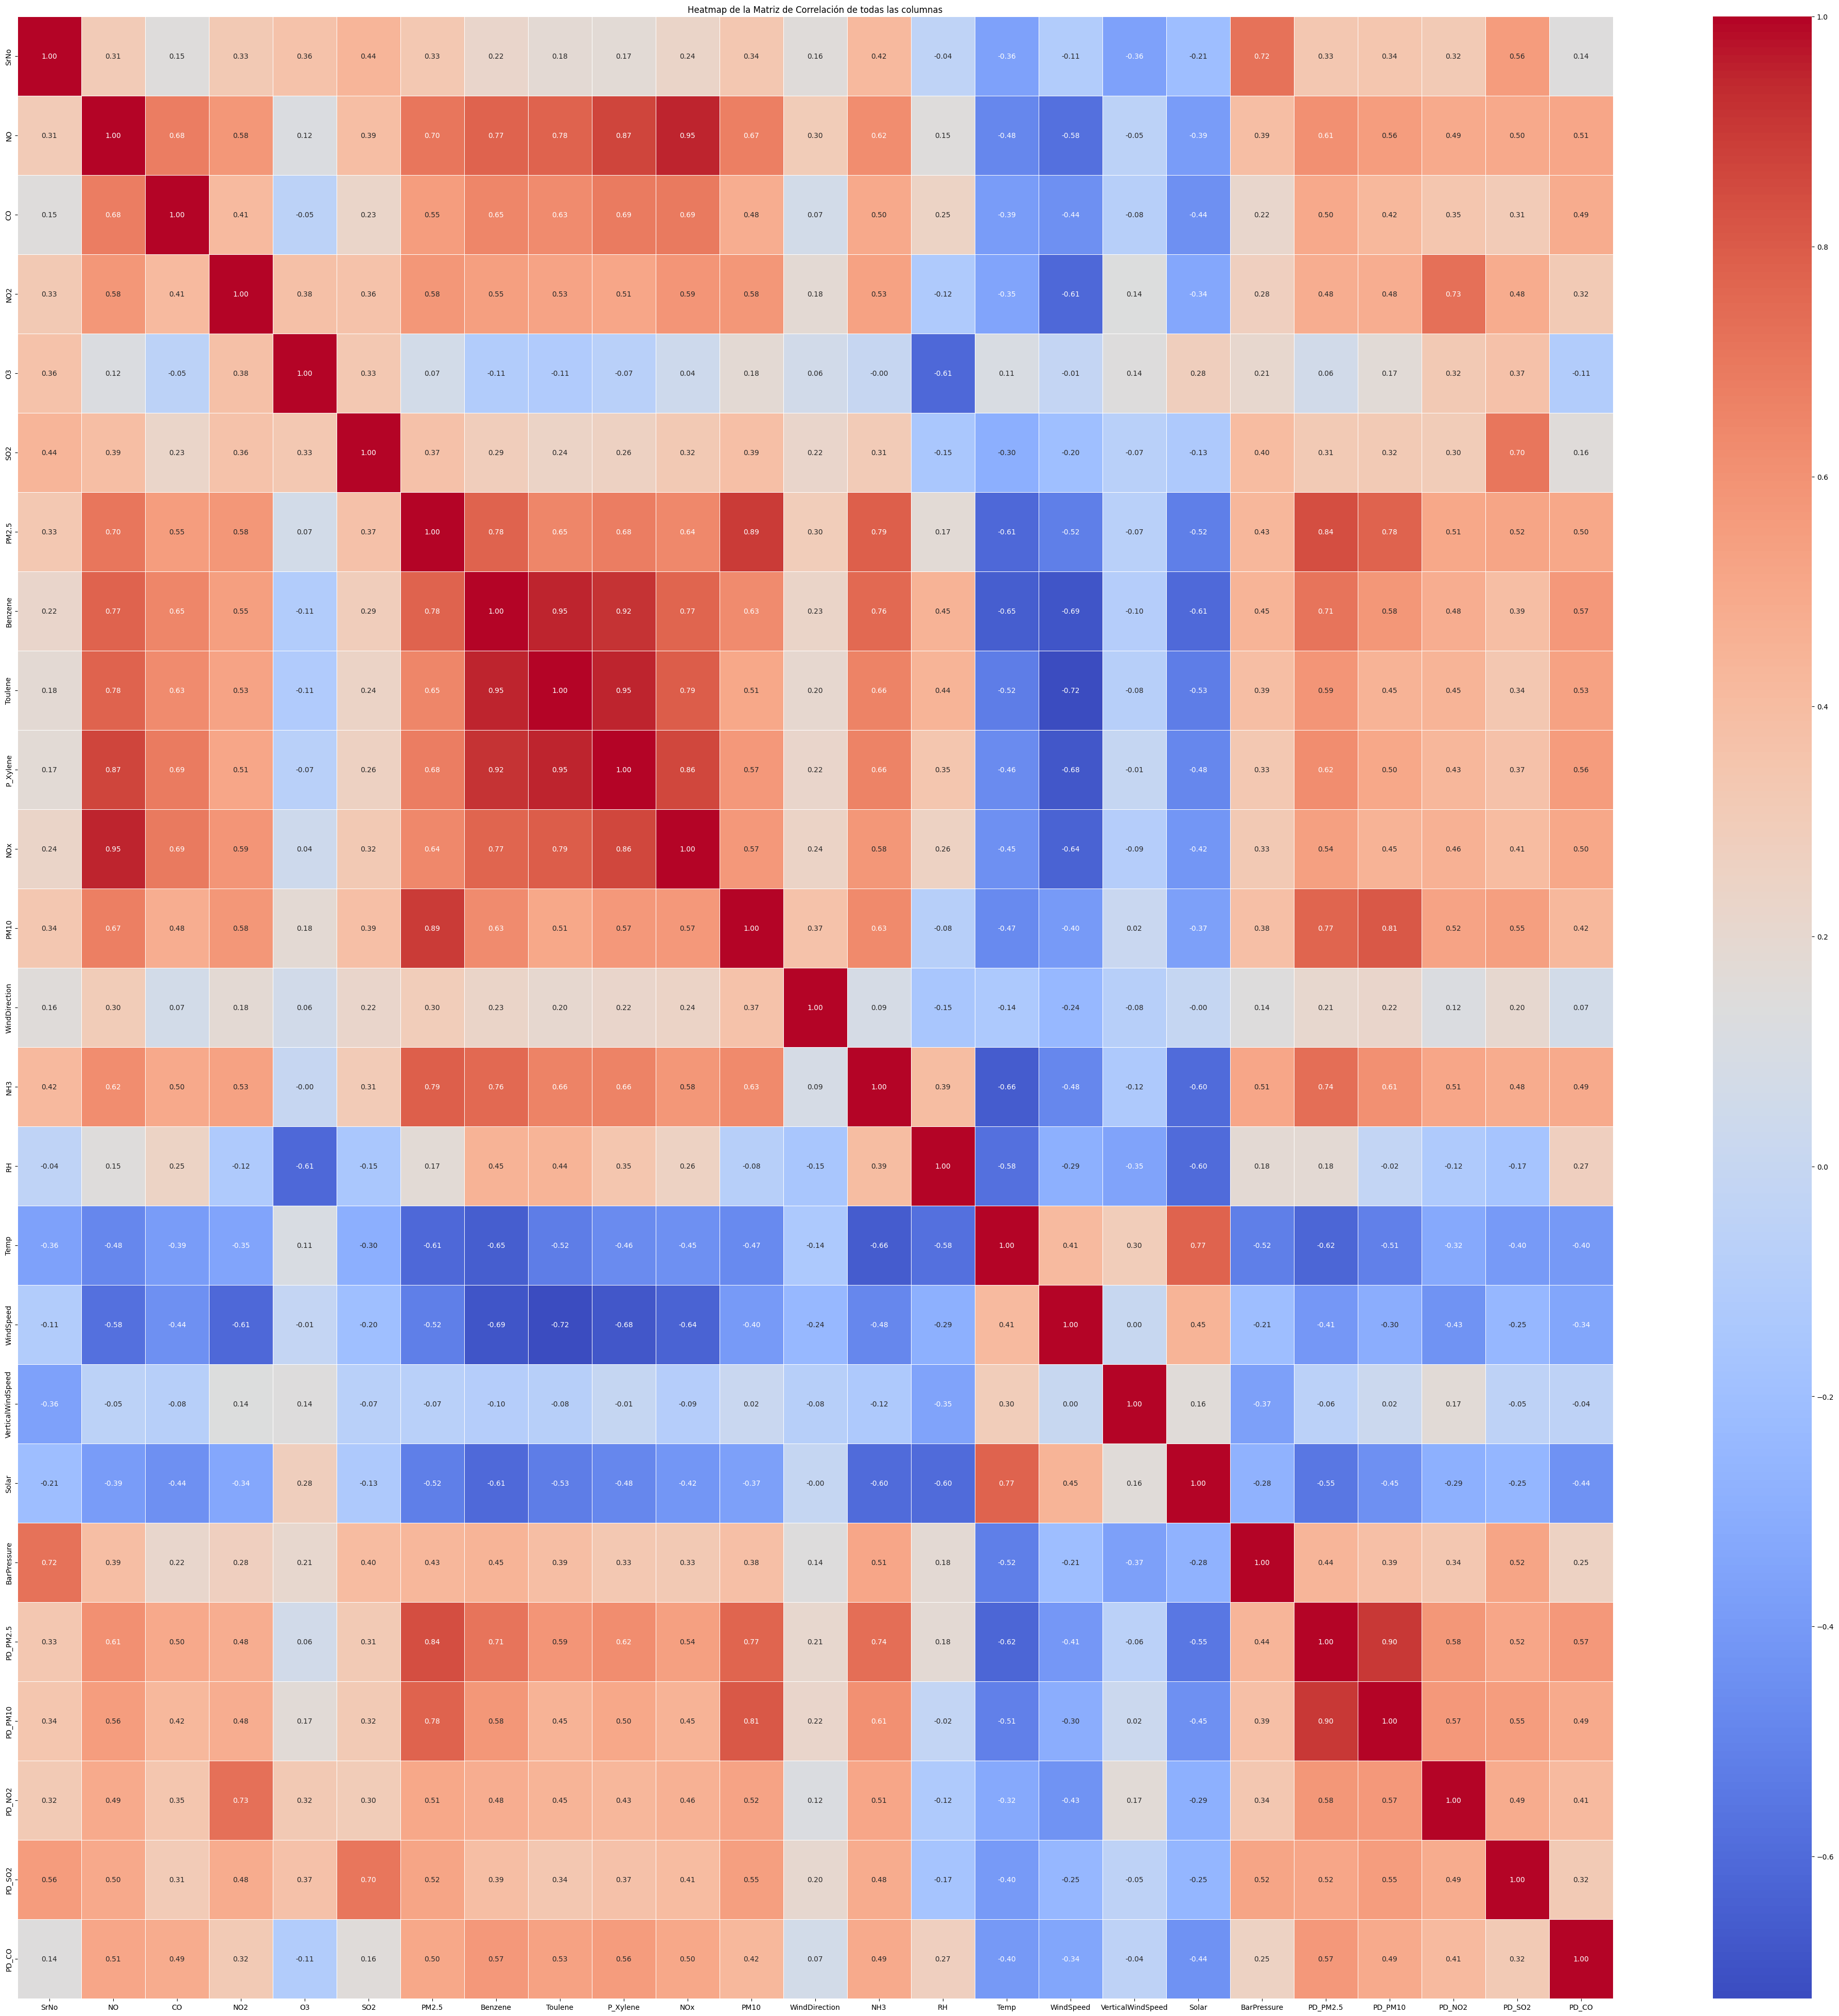

In [ ]:
# Estos dos son para las matrices de correlacion antes ejecutadas y las 5 columnas

sns.heatmap(correlacion_matriz_dataframenulos, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Matriz de Correlación dataframe nulos para 5 columnas del data set")
plt.show()


sns.heatmap(correlacion_matriz_dataframefill, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Matriz de Correlación dataframe fill para 5 columnas del data set")
plt.show()

# Puedo obtener un heat map para todos los datos, solo tome en cuenta que va a hacer mas dificil la visualizacion
# Se puede modificar el figsize, pero con 19 columnas numericas, igualmente puede ser dificil llegar a conclusiones
correlacion_matriz = dataframenulos.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlacion_matriz, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Matriz de Correlación de todas las columnas")
plt.show()




Si como analista quiero agarrar mis datos y usar las variables categoricas para hacer alguna comparacion entre si, puedo filtrar mis datos, en este ejemplo vamos a filtrar de la columna Weather las estaciones Moonsoon y Summer para ver diferencias en las correlaciones.

Paso 1: Separar los datos del dataframe fill, se tienen que filtrar los datos por estacion, cuando se hace PCAs u otros analisis, es bueno cambiar los valores categoricos por un numero, por ello estamos usando el get dummies. Por ejemplo, si la fila 24 del data frame tiene un 1 en la columna Monson, significa que los datos de la fila 24 fueron extraidos en esa estacion. Para ello usamos en pandas el getdummies.


Paso 2: Crear los heatmaps de ambos

El objetivo de este codigo es que aprendamos que la granularidad de los datos puede darnos resultados diferentes. Esto depende del analista.

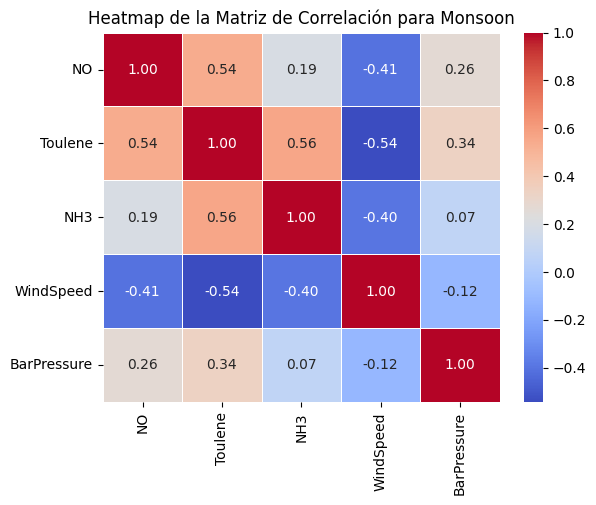

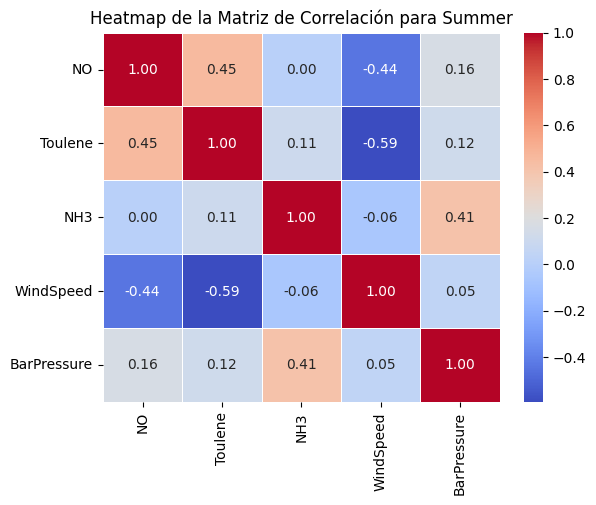

In [ ]:
# Copia del dataframe
dataframefill_copy = dataframefill.copy()

# Seleccionar 5 columnas para el estudio para que los heatmaps no sean muy difíciles de leer
columnas_seleccionadas_2 = ['NO', 'Toulene', 'NH3', 'WindSpeed', 'BarPressure']

# A la columna Weather le asignamos valores numéricos a las estaciones
dataframefill_copy = pd.get_dummies(dataframefill_copy, columns=['Weather'], drop_first=True)


# Filtrar para obtener solo las filas donde Weather_Monsoon es 1
dataframefill_Monsoon = dataframefill_copy[dataframefill_copy['Weather_Monsoon'] == 1]
columnas_a_eliminar = ['Weather_Spring', 'Weather_Summer', 'Weather_Winter']
dataframefill_Monsoon = dataframefill_Monsoon.drop(columns=columnas_a_eliminar)

# Filtrar para obtener solo las filas donde Weather_Summer es 1
dataframefill_Summer = dataframefill_copy[dataframefill_copy['Weather_Summer'] == 1]
columnas_a_eliminar2 = ['Weather_Spring', 'Weather_Monsoon', 'Weather_Winter']
dataframefill_Summer = dataframefill_Summer.drop(columns=columnas_a_eliminar2)

# Paso 2: Crear los Heatmaps

# Heatmap para Monsoon
dataframefill_Monsoon_correlacion = dataframefill_Monsoon[columnas_seleccionadas_2].corr()
sns.heatmap(dataframefill_Monsoon_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Matriz de Correlación para Monsoon")
plt.show()

# Heatmap para Summer
dataframefill_Summer_correlacion = dataframefill_Summer[columnas_seleccionadas_2].corr()
sns.heatmap(dataframefill_Summer_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Matriz de Correlación para Summer")
plt.show()

#Podemos ver que los valores de correlacion pueden cambiar mucho entre una estacion y la otra
#El heat map en colores se ve muy similar hay correlaciones en Monsoon de -0.54 enter windspeed y Toluene, en el caso del summer esta correlacion es mas grande -0.59
#Sin emmbargo, una correlacion verdaderamente fuerte entre dos variables es R = 0.8, basados en el valor mas ampliamente utilizado


En esta parte vamos a observar los boxplot, el cual nos permite ver outliers, esto es importante por que los valores outliers son datos anormales que salen por fuera del box plot. Hay que considerar varios aspectos:

1- Si tener datos dispersos es un comportamiento normal

2- Si tener esos datos por fuera se pueden eliminar

3- Las consecuencias que puede tener dejar los outliers o quitarlos.

Tenemos de base lo anterior, donde vimos como hacer heatmaps y ver posibles correlaciones, vamos a intentar eliminar outliers y obtener de nuevo un heatmap para comparar con el heatmap anterior.


<Axes: >

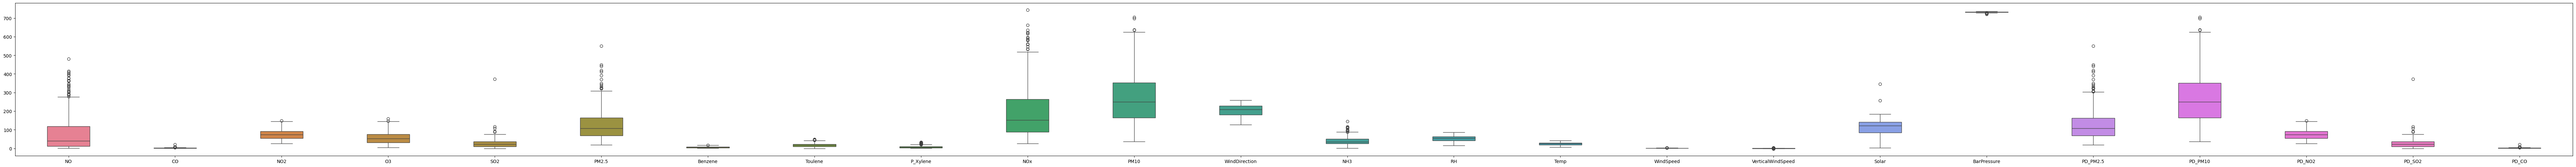

In [ ]:
# Estas dos lineas sirve para imprimir el boxplot de todas las columnas, el figsize usa esos numeros para poder visualizar mejor
plt.figure(figsize=(100, 6))
sns.boxplot(data=dataframefill, width=0.4)

#Un outlier como tal es un dato atipico desviado del conjunto de datos
#Vamos a usar la columna NO que tiene muchos puntos fuera del boxplot
#Los outliers pueden identificarse a partir del rango intercuartilico del boxplot
#Este approach consiste en restar el tercer y cuarto quartil e identificar los valores fuera del rango
# Con estos datos vamos a compara las matrices de correlacion para ver posibles cambios.


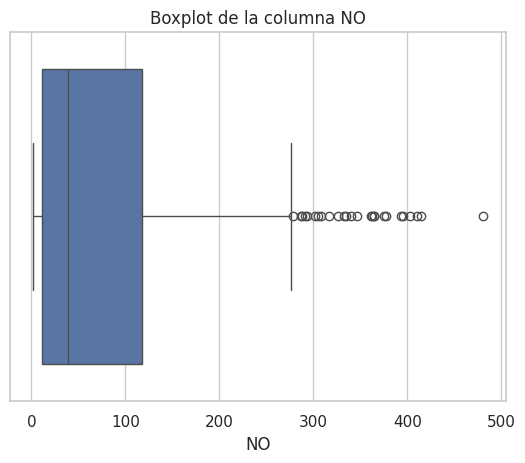

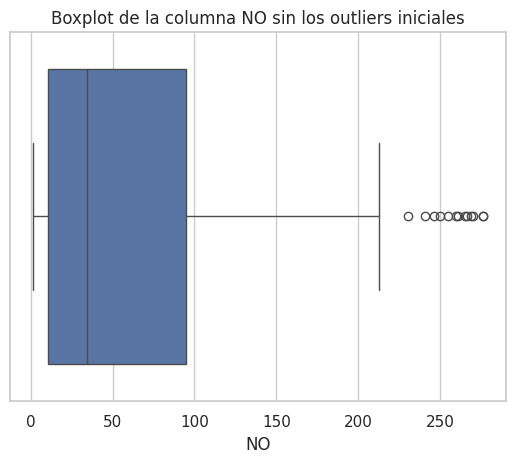

count    377.000000
mean      62.705782
std       68.047344
min        1.120000
25%       10.670000
50%       34.480000
75%       94.840000
max      276.420000
Name: NO, dtype: float64
count    403.000000
mean      81.114342
std       97.007507
min        1.120000
25%       11.405000
50%       39.220000
75%      117.675000
max      480.900000
Name: NO, dtype: float64


In [ ]:
# Vamos a utlizar la columna NO podemos ver que tiene una cantidad mayor de outliers

sns.boxplot(x=dataframefill['NO'])
plt.title('Boxplot de la columna NO')
plt.show()

# Calcular los límites de los bigotes
Q1 = dataframefill['NO'].quantile(0.25)
Q3 = dataframefill['NO'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dataframefill[(dataframefill['NO'] < limite_inferior) | (dataframefill['NO'] > limite_superior)]['NO']

#Elimina los outliers
df_sin_outliers=dataframefill[(dataframefill['NO'] >= limite_inferior) & (dataframefill['NO'] <= limite_superior)]


sns.boxplot(x=df_sin_outliers['NO'])
plt.title('Boxplot de la columna NO sin los outliers iniciales')
plt.show()

print (df_sin_outliers["NO"].describe())
print (dataframefill['NO'].describe())


Del codigo anterior tenemos un boxplot con todos los datos de la columna NO vs un boxplot sin los outliers. Con el comando dataframe.describe() podemos ver que la cantidad de datos disminuye asi como su media, desviacion estandar, mediana, minima.

Vamos a comparar de las columnas seleccionadas los heatmaps. Se puede observar como la eliminacion de outliers afecta los valores de correlacion.

(403, 25)
(377, 25)


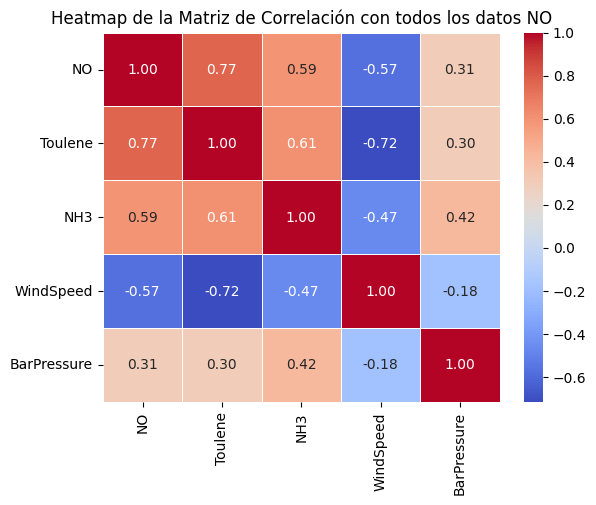

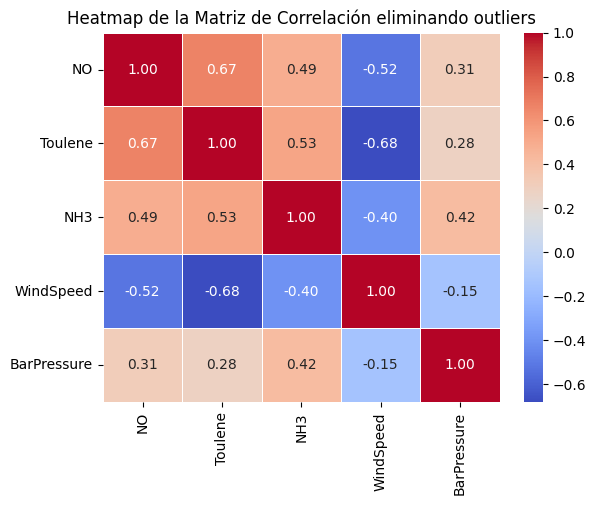

In [ ]:
columnas_seleccionadas_2 = ['NO', 'Toulene', 'NH3', 'WindSpeed', 'BarPressure']

print (dataframefill.shape)
print (df_sin_outliers.shape)

dataframefill_corr= dataframefill[columnas_seleccionadas_2].corr()
sns.heatmap(dataframefill_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Matriz de Correlación con todos los datos NO")
plt.show()


df_sin_outliers_corr= df_sin_outliers[columnas_seleccionadas_2].corr()
sns.heatmap(df_sin_outliers_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de la Matriz de Correlación eliminando outliers")
plt.show()



En el codigo de abajo, se utiliza scipy.stats para comparar los p values. Los valores de p se utlizan para rechazar o fallar en rechazar la hipotesis nula.

En este caso nuestra hipotesis nula "No hay correlacion entre las dos variables", pues estamos usando la correlacion de Pearson

Al Obtener ambos valores de p los dos son muy cercanos a cero uno del orden e-80 y el otro de e-50. Esto lo que nos comprueba es que si hay una correlacion entre NO y Toulene, aun cuando elimino los outliers, la eliminacion de estos outliers disminuye el valor de la correlacion.

Eliminar los outliers o dejarlos depende del contexto, puede que los outliers son datos normales de la variabilidad del proceso a la hora de tomar los datos, a como puede ser que se deba a que esos datos definitivamente no son representativos.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Supongamos que tienes un DataFrame llamado dataframefill
columna1 = 'NO'
columna2 = 'Toulene'

# Calcular el coeficiente de correlación de Pearson y el valor p
correlacion_coef, p_value = pearsonr(dataframefill[columna1], dataframefill[columna2])

# Imprimir el valor p
print(f'Valor p para datos completos: {p_value}')

# Calcular el coeficiente de correlación de Pearson y el valor p
correlacion_coef, p_value = pearsonr(df_sin_outliers[columna1], df_sin_outliers[columna2])

# Imprimir el valor p
print(f'Valor p para datos sin outliers: {p_value}')



Valor p para datos completos: 8.333588075696159e-80
Valor p para datos sin outliers: 4.996842063271426e-50


En esta parte vamos a obtener los siguiente, para todas las columnas numericas:


1- el skweness que es una medida de la asimetria de los datos, la cual nos sugiere lo siguiente:

valor=0 los datos son simetricos
valor>0 los datos estan inclinados hacia la derecha
valor<0 los datos estan inclinados hacia la izquierda

2- los valores de p usando la prueba Shapiro-Wilk que nos permite ver si los datos siguen distribucion normal

NO
Skew: 1.65


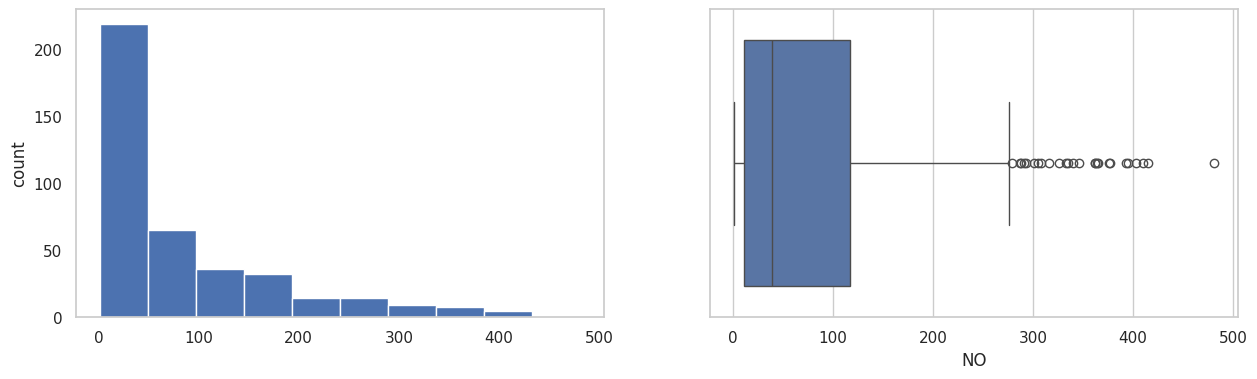

Valor p de Shapiro-Wilk: 4.467001553093967e-23
La distribución no parece normal.

CO
Skew: 4.17


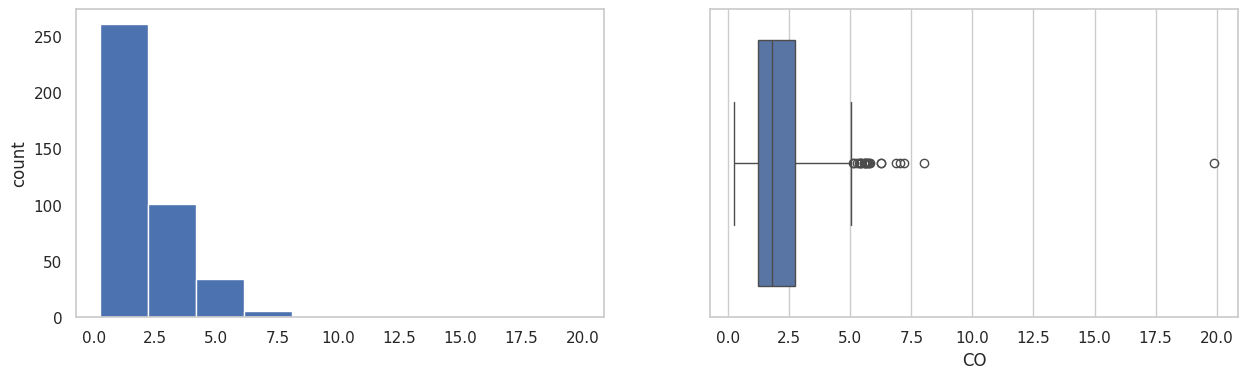

Valor p de Shapiro-Wilk: 2.8060832569791465e-25
La distribución no parece normal.

NO2
Skew: 0.35


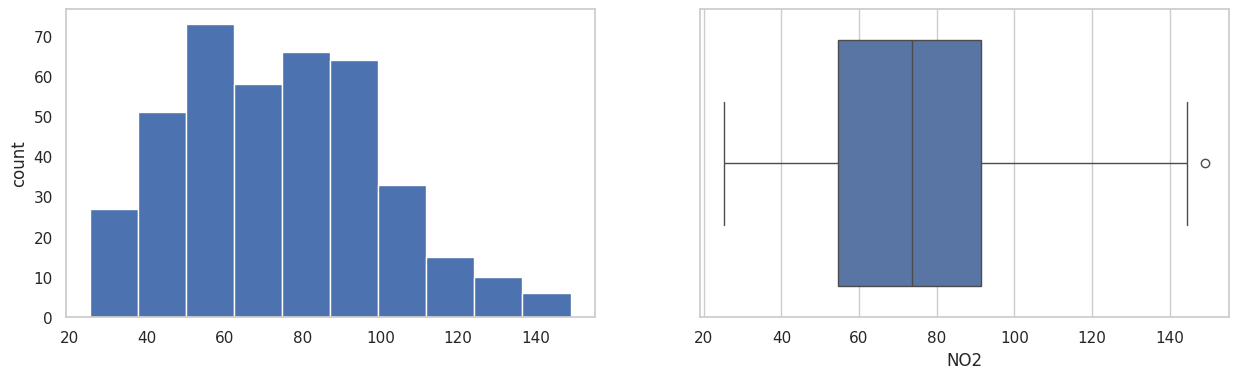

Valor p de Shapiro-Wilk: 0.00010837202717084438
La distribución no parece normal.

O3
Skew: 0.54


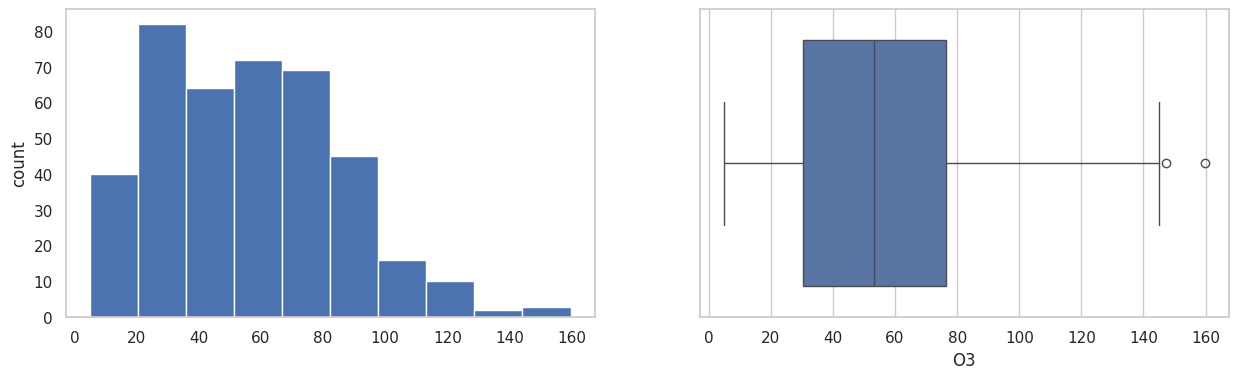

Valor p de Shapiro-Wilk: 1.4250736590781798e-08
La distribución no parece normal.

SO2
Skew: 6.9


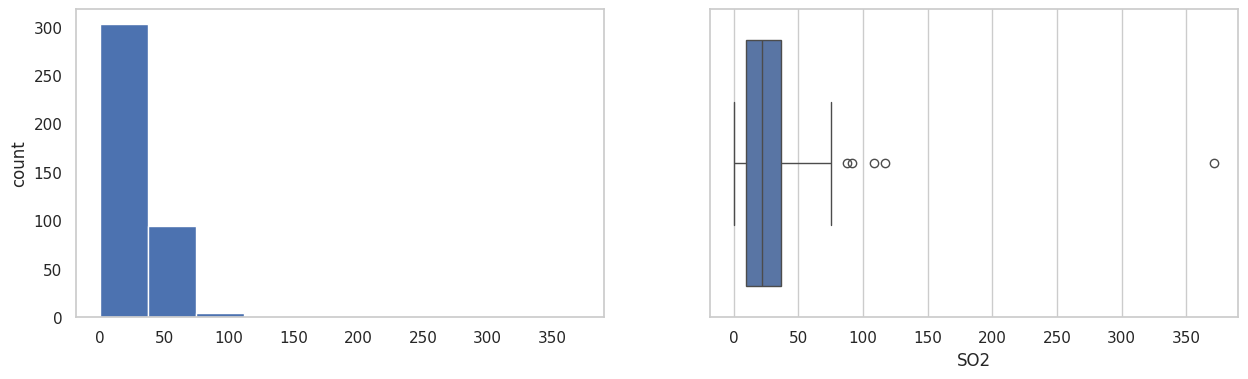

Valor p de Shapiro-Wilk: 6.770199866792576e-29
La distribución no parece normal.

PM2.5
Skew: 1.46


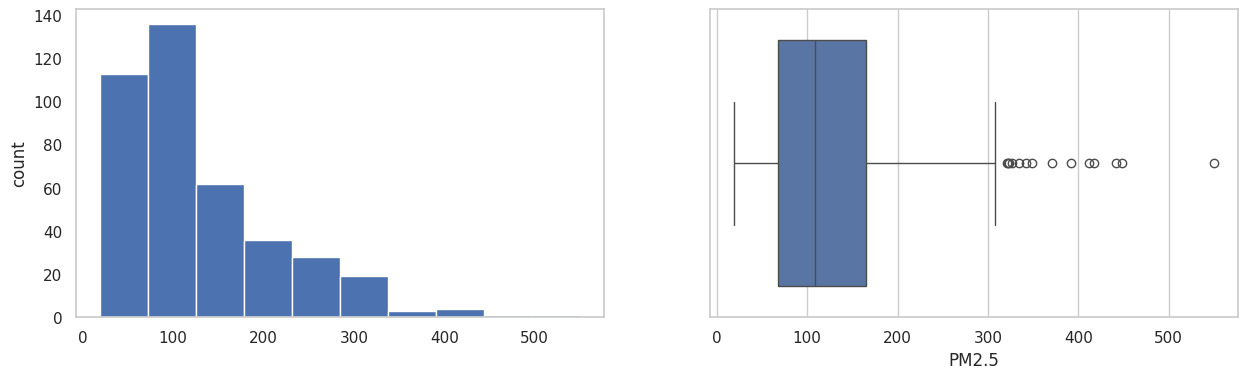

Valor p de Shapiro-Wilk: 1.098070186327201e-17
La distribución no parece normal.

Benzene
Skew: 0.71


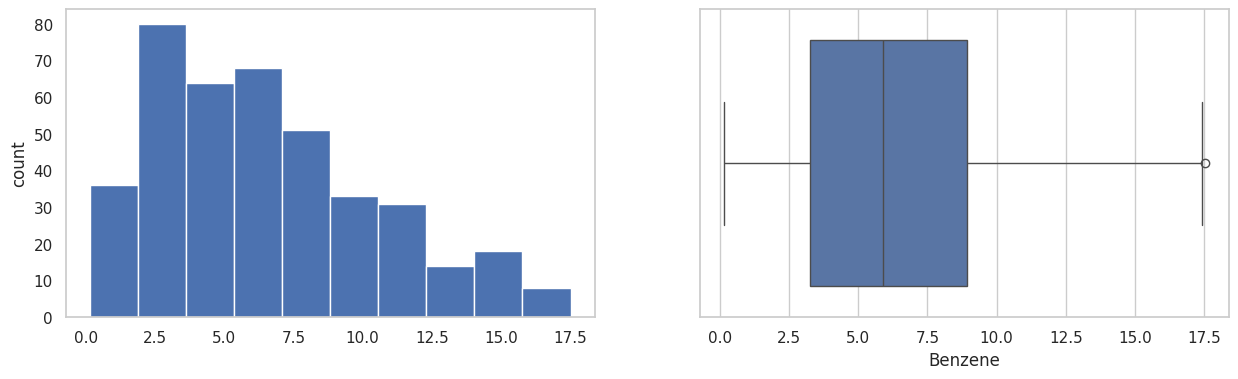

Valor p de Shapiro-Wilk: 1.5370118372493025e-11
La distribución no parece normal.

Toulene
Skew: 0.61


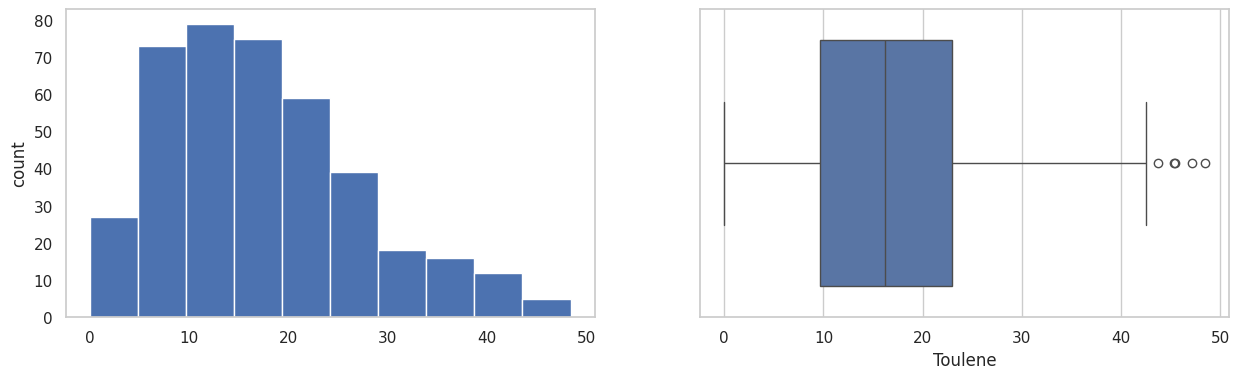

Valor p de Shapiro-Wilk: 1.4182945484719767e-08
La distribución no parece normal.

P_Xylene
Skew: 1.66


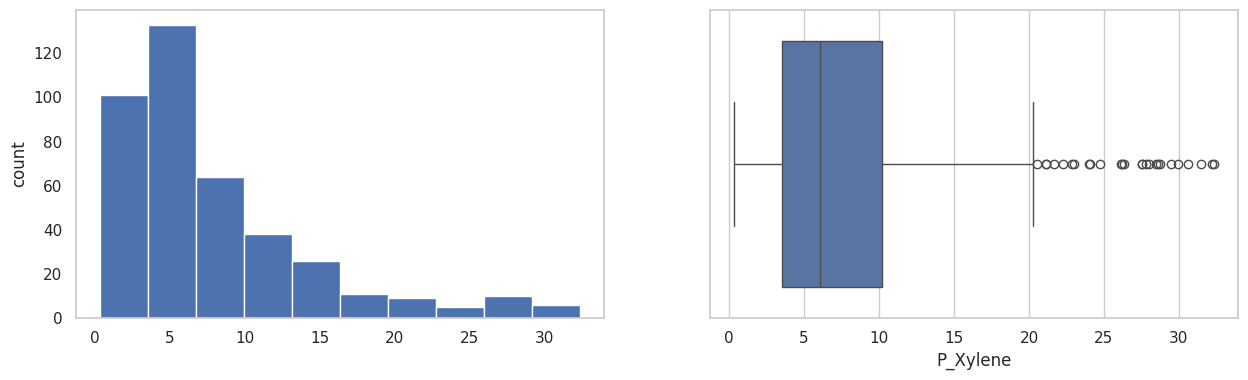

Valor p de Shapiro-Wilk: 3.682183833904719e-20
La distribución no parece normal.

NOx
Skew: 1.32


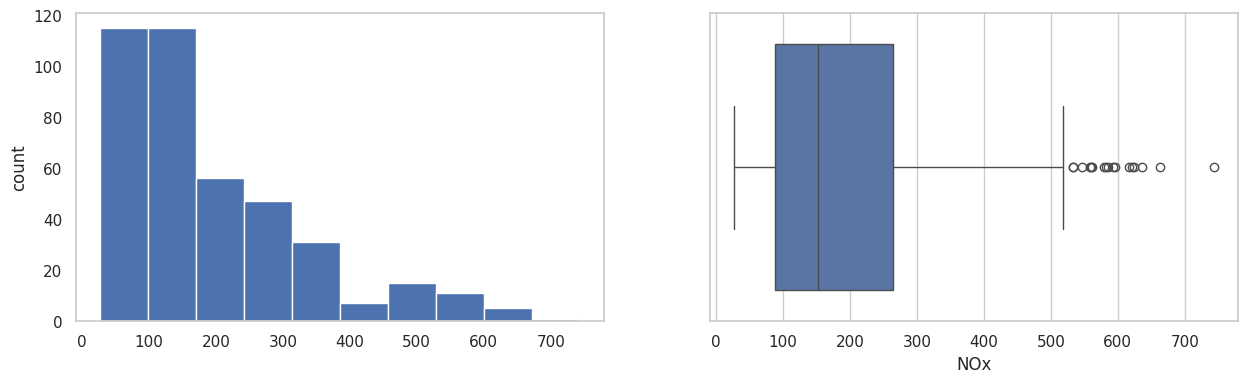

Valor p de Shapiro-Wilk: 7.84369631796162e-18
La distribución no parece normal.

PM10
Skew: 0.61


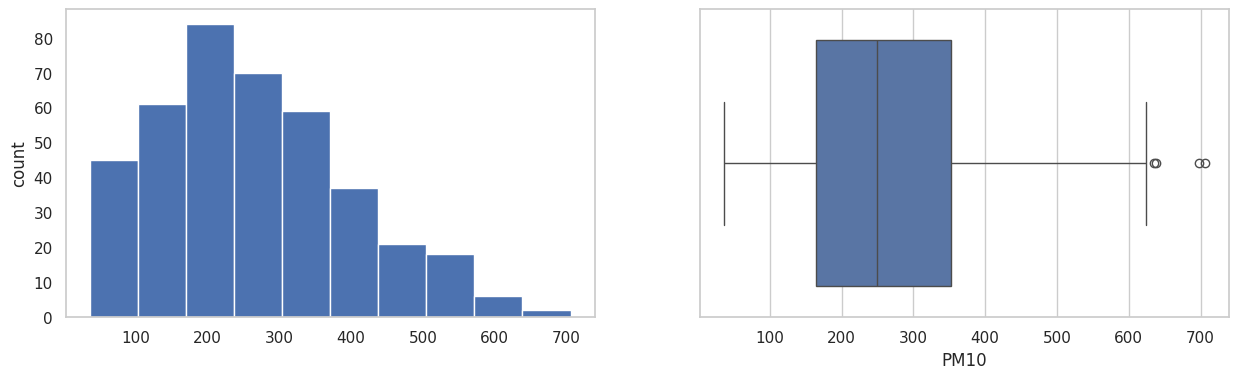

Valor p de Shapiro-Wilk: 6.775723448981807e-08
La distribución no parece normal.

WindDirection
Skew: -0.49


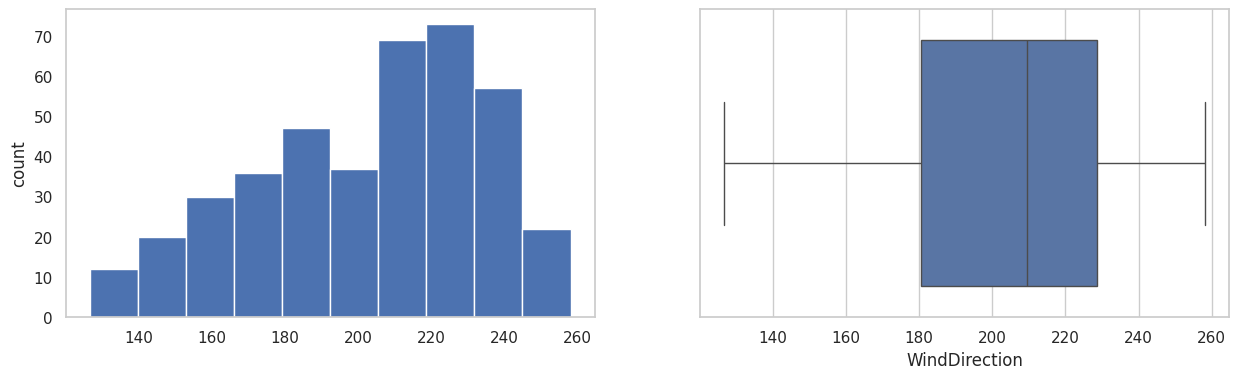

Valor p de Shapiro-Wilk: 3.692600447635641e-09
La distribución no parece normal.

NH3
Skew: 1.34


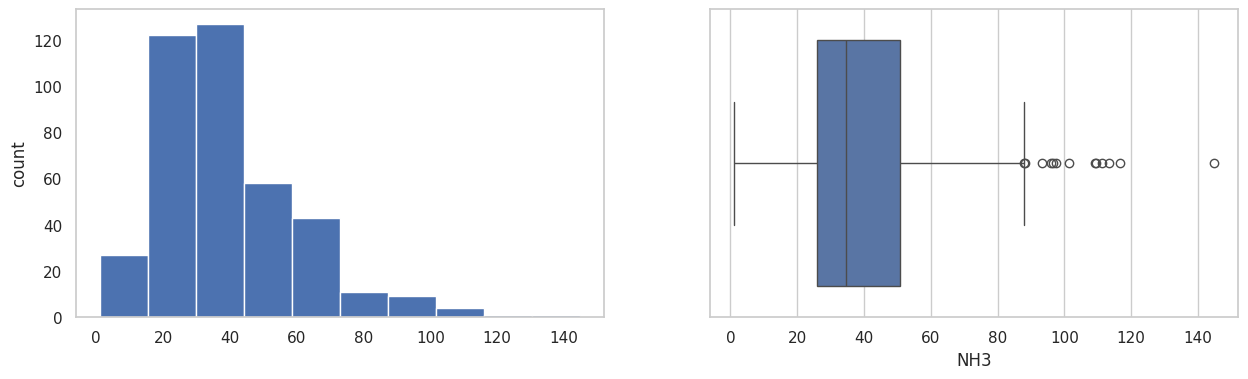

Valor p de Shapiro-Wilk: 1.323179643652507e-14
La distribución no parece normal.

RH
Skew: -0.37


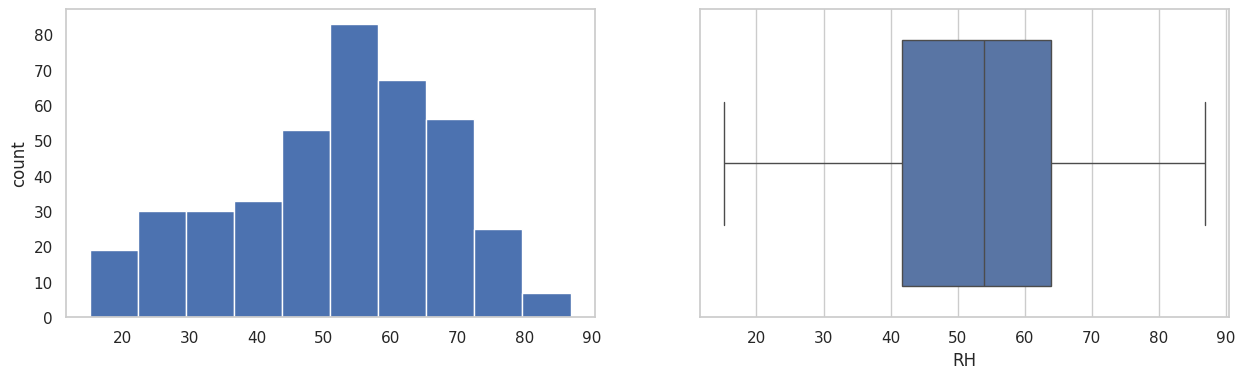

Valor p de Shapiro-Wilk: 1.1201758525203331e-06
La distribución no parece normal.

Temp
Skew: -0.57


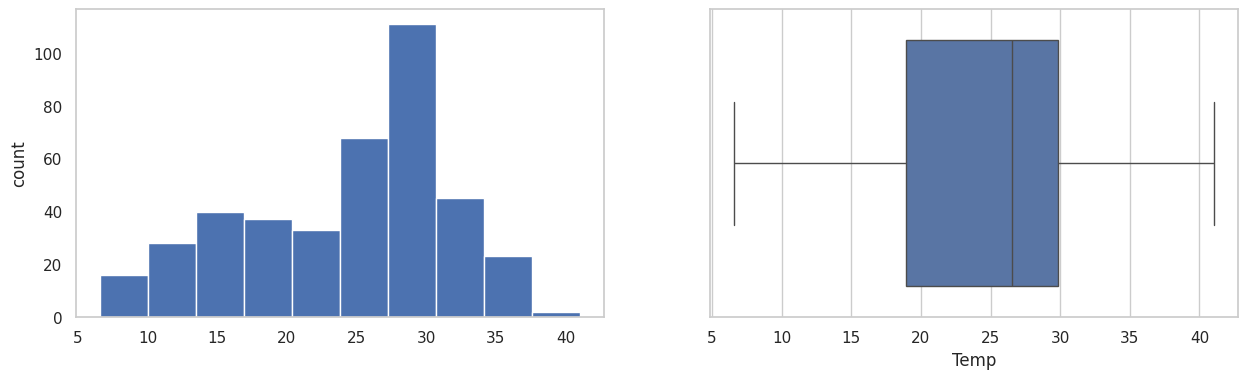

Valor p de Shapiro-Wilk: 1.797914421508562e-11
La distribución no parece normal.

WindSpeed
Skew: 0.9


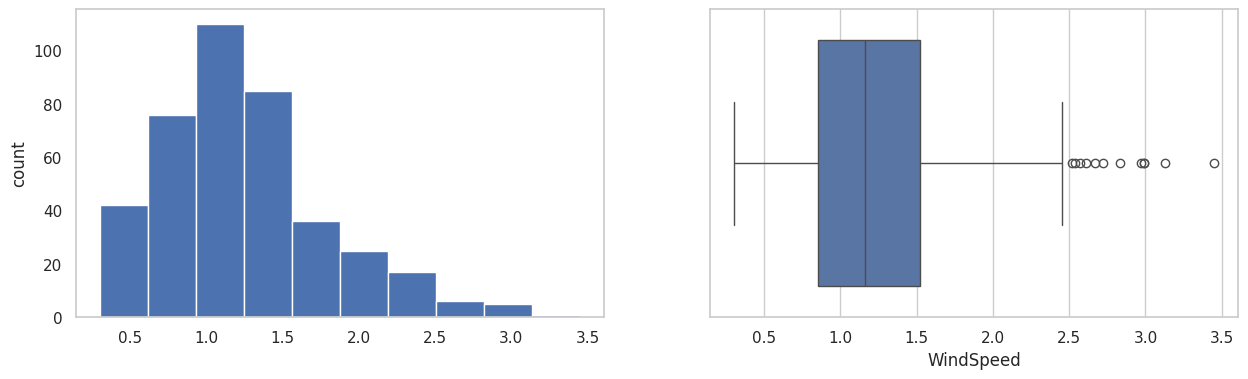

Valor p de Shapiro-Wilk: 2.097991502747476e-10
La distribución no parece normal.

VerticalWindSpeed
Skew: 0.87


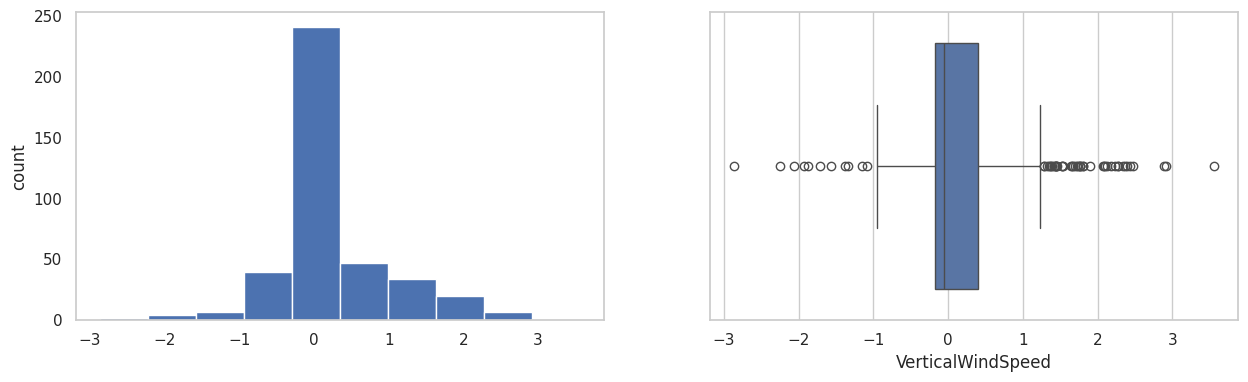

Valor p de Shapiro-Wilk: 1.6888280214337924e-17
La distribución no parece normal.

Solar
Skew: 0.15


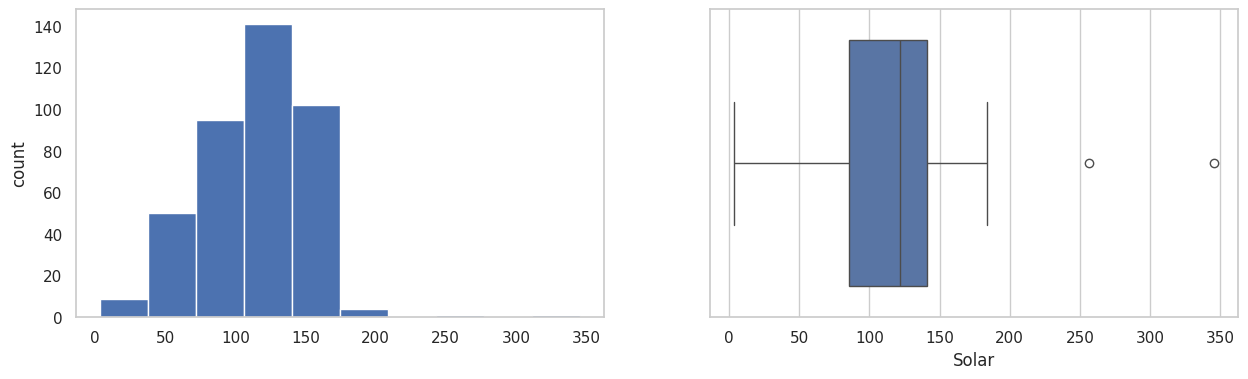

Valor p de Shapiro-Wilk: 1.2845252205656577e-12
La distribución no parece normal.

BarPressure
Skew: -1.97


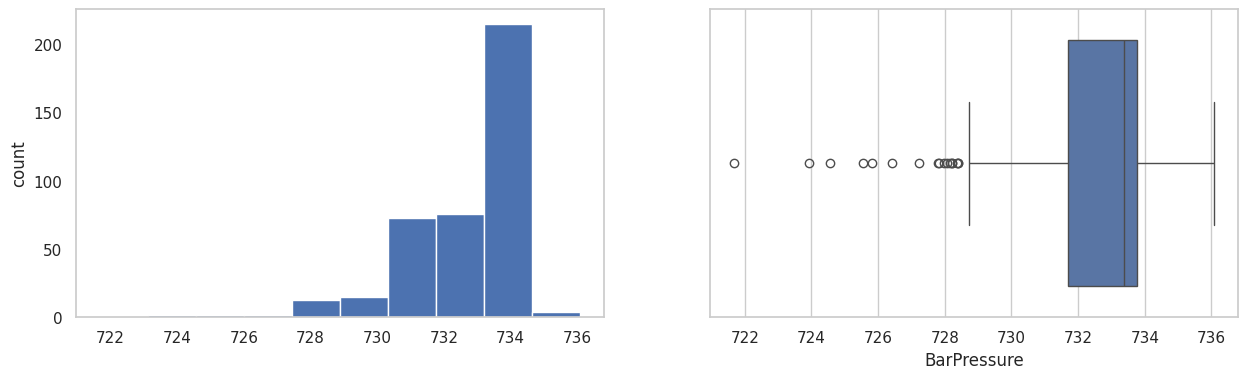

Valor p de Shapiro-Wilk: 1.0366014986806436e-20
La distribución no parece normal.

PD_PM2.5
Skew: 1.47


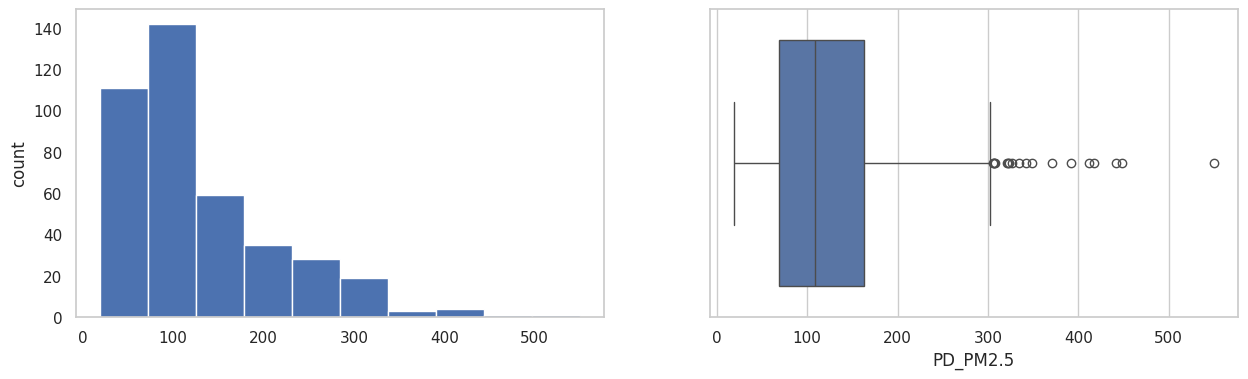

Valor p de Shapiro-Wilk: 7.977305839223635e-18
La distribución no parece normal.

PD_PM10
Skew: 0.62


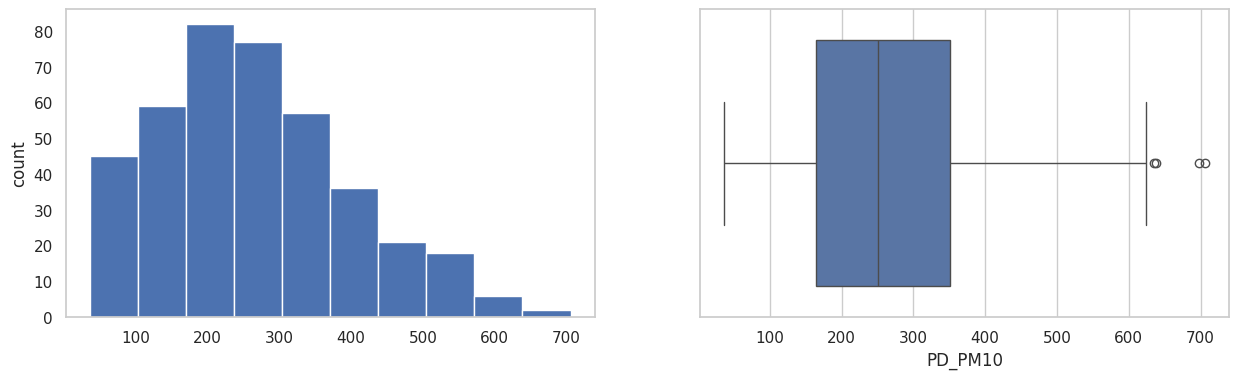

Valor p de Shapiro-Wilk: 7.553160941142778e-08
La distribución no parece normal.

PD_NO2
Skew: 0.37


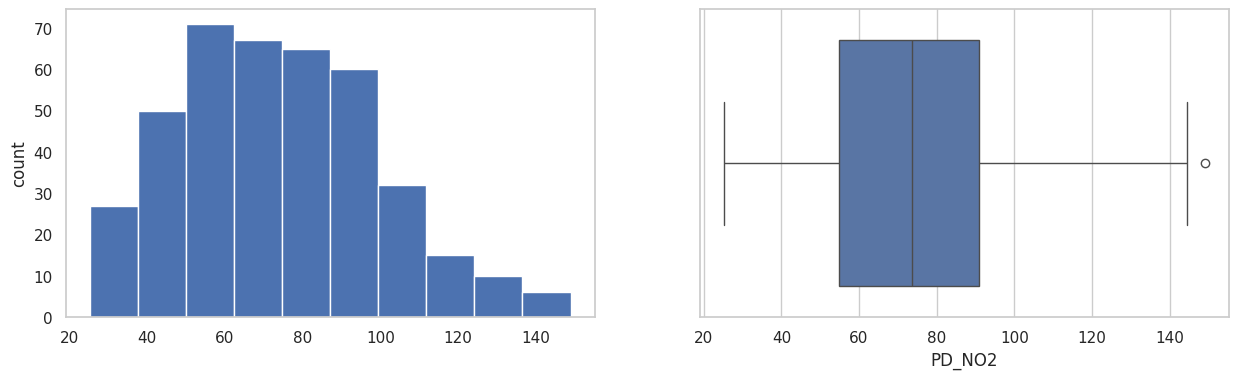

Valor p de Shapiro-Wilk: 0.00013817544095218182
La distribución no parece normal.

PD_SO2
Skew: 7.02


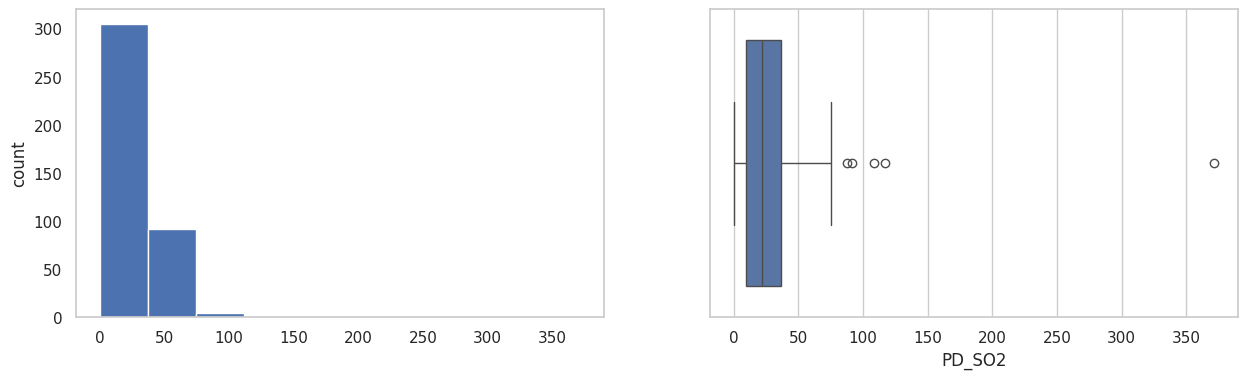

Valor p de Shapiro-Wilk: 4.945577749525308e-29
La distribución no parece normal.

PD_CO
Skew: 4.32


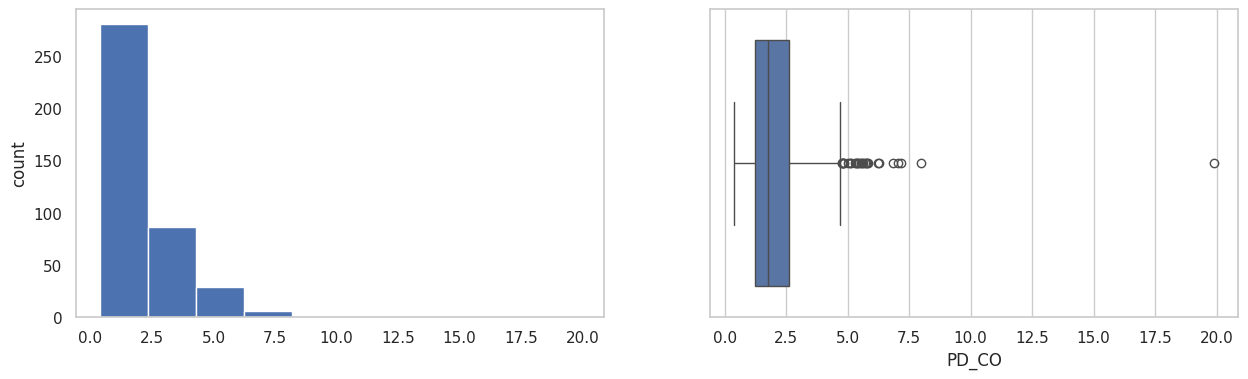

Valor p de Shapiro-Wilk: 9.152223706525436e-26
La distribución no parece normal.



In [ ]:
from scipy.stats import shapiro
cont_cols = ["NO","CO","NO2", "O3","SO2", "PM2.5","Benzene","Toulene","P_Xylene","NOx","PM10","WindDirection","NH3", "RH","Temp","WindSpeed","VerticalWindSpeed", "Solar","BarPressure","PD_PM2.5","PD_PM10","PD_NO2","PD_SO2","PD_CO"]
skew(), 2))

    # Histograma y boxplot
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 2, 1)
    dataframefill[col].hist(bins=10, grid=False)
    plt.ylabel('count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframefill[col])

    plt.show()

    # Prueba de normalidad de Shapiro-Wilk
    stat, p_value = shapiro(dataframefill[col])

    # Imprimir el valor de p
    print('Valor p de Shapiro-Wilk:', p_value)

    # Tomar una decisión basada en el valor de p (por ejemplo, 0.05 como umbral)
    if p_value > 0.05:
        print('La distribución parece normal.\n')
    else:
        print('La distribución no parece normal.\n')


Los valores de p la prueba Shapiro-Wilk que son mucho menor a cero sugiere que la distribución no es normal, como parte del EDA tambien puede post procesarse esos datos para transformarlos, vamos a usar una columna de ejemplo.

La transformacion que se utilizo fue boxcox. En este caso PD_CO, el codigo muestra como la distribucion original esta skewed a la derecha, y despues el histograma muestra como se convierte en una distribucion normal. Es importante que se observe que los valores en x van a cambiar.  

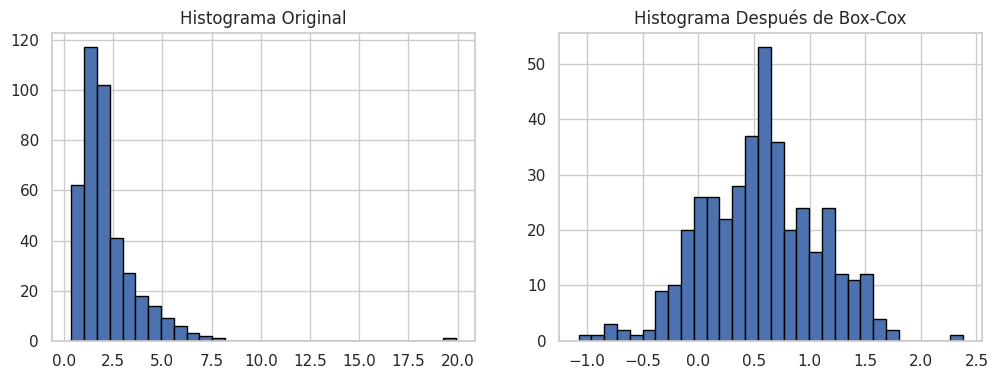

In [ ]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt


data_transformed, lambda_value = boxcox(dataframefill['PD_CO'])

# Histogramas antes y después de la transformación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(dataframefill['PD_CO'], bins=30, edgecolor='black')
plt.title('Histograma Original')

plt.subplot(1, 2, 2)
plt.hist(data_transformed, bins=30, edgecolor='black')
plt.title('Histograma Después de Box-Cox')

plt.show()

La ultima herramienta que vamos a utilizar es la de escalar los resultados, esto sirve cuando tenemos resultados muy dispersos que son validos pero queremos escalarlos de 1 a 0 para comparar con las otras columnas del dataframe, en modelos de aprendizaje automatico escalar estos datos pueden ayudar a que las variables contribuyan de forma equitativa, incluyendo mejorar la convergencia durante el proceso de entrenamiento.

Hay varias formas de escalar datos por ejemplo: Min-Max, transformaciones logaritmicas, y sigmoid, por decir algunos. Para este primer tutorial utilizaremos la min-max para todas las columnas numericas del dataframefill.

In [ ]:
# en esta parte se escala la data

# **Seccion 4: Recomendaciones**

1- Cada conjunto de datos es diferente, asi como el objetivo de cada estudio, no hay una formula infalible para todos los casos

2- Leer los datos con pandas y obtener inicialmente el data.describe y data.info nos da una idea general del estado del dataset.

3- Los valores nulos en una tabla pueden sea eliminarse o reemplazarse, dependiendo del objetivo. Por ejemplo, si como analista quiero determinar si un cliente A es sujeto a un credito prendario, utilizar los datos del cliente B para llenar los espacios de mi dataset, puede llevarnos a errores, por que el sujeto A puede tener caracteristicas completamente diferentes, puedo concluir que es sujeto a creditos pero en realidad no lo es t perjudicar la empresa que presta ese credito. Si por otro lado, tenemos las temperaturas de una zona montanosa y hace falta la temperatura de unos 10 dias pero tengo temperaturas de los dias anteriores y posteriores, se puede de alguna forma reemplazar ese valor vacio con la media, minimo, maximo. O puedo buscar las temperaturas de un lugar similar en esas fechas, en este caso, el error podria no ser tan notorio comparado con el primero.


4- Otro aspecto importante es que el EDA ademas de permitirnos ver posibles correlaciones para orientar mi analisis, dejar la data limpia y entendible nos ayuda despues para entrenar modelos, usar tecnicas como PCA y T-SNE.


5- Si la intencion del estudio es luego hacer un PCA para reducir la dimensionalidad de la matriz, lo mejor es escalar los datos para que todas las variables esten en igualdad de condiciones para el analisis.

6- Si tengo variables categoricas, como en el caso del tutorial que tengo diferentes estaciones en la columna "Weather", puede que como analista quiera comparar una estacion con otra. Sin embargo, en el analisis, nos podemos dar cuenta que no tenemos la misma cantidad de datos, si la disparidad del sampling es muy alta es posible que no podamos concluir con seguridad, sin embargo, si hacemos analisis por variables categoricas podemos darnos cuenta que esa segregacion hace que veamos resultados diferentes, puede ser que en verano la gente utilice mas el automovil para moverse y la cantidad de CO2 sea mayor que en invierno por que la gente tiene menor movilidad, esto a manera de ejemplo.

7- En este tutorial, el proposito es de aprendizaje, si corremos el codigo para las 19 columnas variables podria hacer que el tiempo de ejecucion incremente, a veces es bueno seleccionar ciertas variables de estudio, sin embargo, si no estudian todas las variables puede llevar a errores de interpretacion, en este tutorial, se usaron ciertas columnas pero a la hora de los histogramas y boxplots se usaron todas las variables. Hay que darle importancia a la data.